# Question 6 
Obtain the matter power spectrum by using transfer functions

In [4]:
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
import camb
from camb import model

In [5]:
#we define the cosmology
H0 = 67.4
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2= omega_ch2, tau = tau)






class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

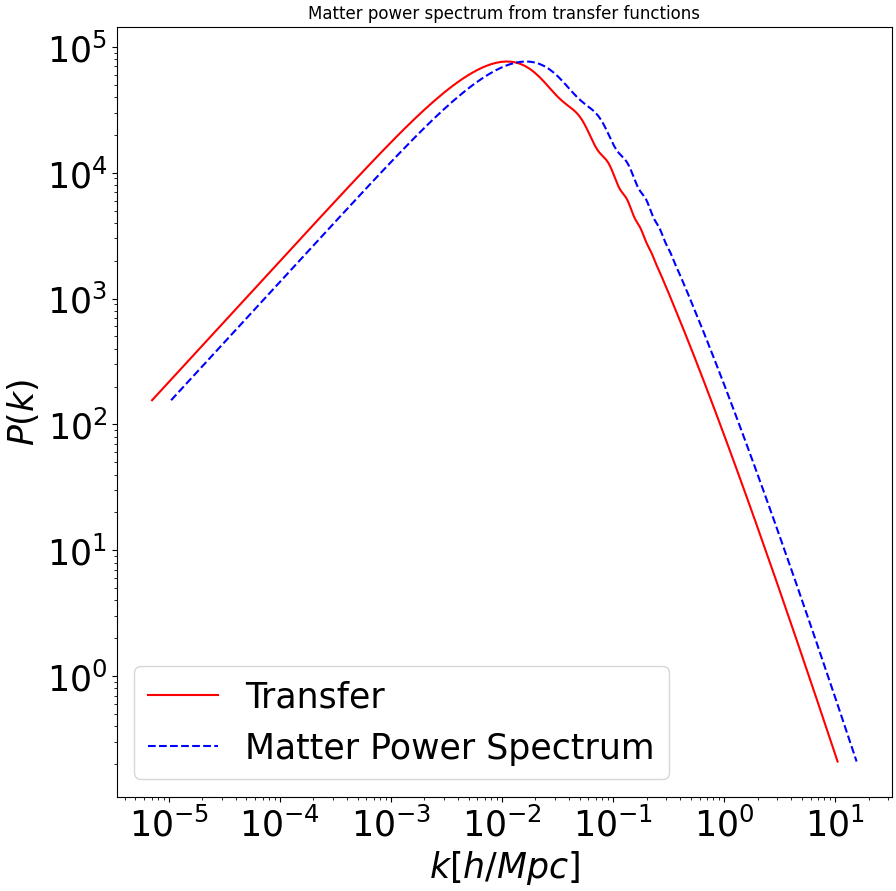

In [3]:
#redshifts
z = np.linspace(0.0, 10, 1000)

#set Matter Power Spectrum
#for this we use the function that camb provides
pars.set_matter_power(redshifts=[0], kmax = 10)
results = camb.get_results(pars)

#obtain the transfer function
trans = results.get_matter_transfer_data()
kh = trans.transfer_data[0,:,0]
k = kh * results.Params.h

transfer = trans.transfer_data[model.Transfer_tot-1,:,0]

#we obtain the primordial power spectrum
PK_prim = results.Params.scalar_power(k)

#all together 
matter_power = PK_prim * transfer**2 * k**4 / (k ** 3/ (2 * np.pi**2))

#we can compare it with the CAMB´s output for the matter power spectrum 
kh2,zs,PK = results.get_linear_matter_power_spectrum(hubble_units=False)

#all that is left is to plot everything
plt.figure(figsize=(10,10))
plt.loglog(k, matter_power, c='r', label='Transfer')
plt.loglog(kh2, PK[0, :], c='b', ls='--',label='Matter Power Spectrum')
plt.legend(fontsize=25)
plt.title("Matter power spectrum from transfer functions")
plt.ylabel(r"$P(k)$", fontsize=25)
plt.xlabel(r'$k [h/Mpc]$', fontsize=25)
plt.style.use(['science'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()

As we can see there is a slight difference between the power spectrum provided by camb and the one that I obtained. 
I assume there must be an error from my behalf. Besides that we see that they behave, or better say, they show in a very similar way, the only thing is that the one that I obtained is a little to the left.